In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from datetime import date

In [2]:
url = 'https://raw.githubusercontent.com/amitfallach/Analysis-for-fun/main/ds_salaries.csv'
df= pd.read_csv(url)
df = df.copy() 
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [3]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [4]:
df = df.drop("Unnamed: 0", axis = 1)

## Let's look at how the data splitin the column "job title"

In [5]:
jobs = df.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)

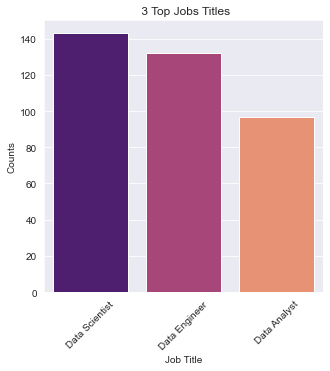

In [6]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.barplot(x='job_title',y=0,data = jobs[:3],palette = 'magma')
plt.title(' 3 Top Jobs Titles')
plt.xlabel('Job Title')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [7]:
df["experience_level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

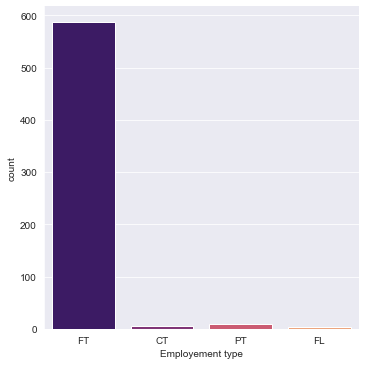

In [8]:
sns.catplot(x='employment_type',data = df,kind = 'count',palette = 'magma')
plt.xlabel('Employement type')
plt.show()

## change the measurement of "salary_in_usd" to shekels and use only rows of employees that work full-time job.

In [9]:
df = df.rename(columns= {'salary_in_usd':'salary_in_Shekel_per_month'})
df['salary_in_Shekel_per_month'] = df['salary_in_Shekel_per_month']*(3.3/12)
df = df[df['employment_type']=="FT"].reset_index(drop = True)

## check the 'salary_in_Shekel_per_month' for top 3 jobs on Entry-level

In [10]:
df = df[df['experience_level']=="EN"].reset_index(drop = True)
df = df[(df['job_title']=="Data Analyst") | (df['job_title'] == "Data Engineer") | (df['job_title'] == "Data Scientist")].reset_index(drop = True)

C:\Users\amitf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


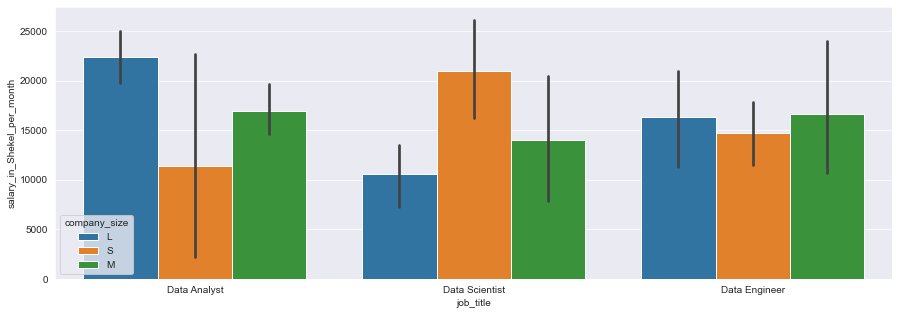

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(df['job_title'],df['salary_in_Shekel_per_month'],hue=df['company_size'])
plt.show()

> ## we can see from the dataset that :
> ### Data Analysts More affordable to work in large companies . and corporations.
> ### Data Scientist More affordable to work in small companies .
> ### Data Engineer More affordable to work in medium or large companies . 

### the average salary in each type of company for the 3 professions.

In [12]:
df.groupby(['job_title','company_size'])[['salary_in_Shekel_per_month']].mean()

salary_in_Shekel_per_month
job_title      company_size                            
Data Analyst   L                           22412.500000
               M                           16945.610000
               S                           11417.450000
Data Engineer  L                           16339.812500
               M                           16630.304167
               S                           14669.737500
Data Scientist L                           10550.375000
               M                           13994.268750
               S                           21006.104167